In [3]:
from scipy.fftpack import fft2, ifft2
from scipy import loadtxt, exp, empty, real
from pylab import imshow, plot, show, gray
from numpy.fft import rfft2, irfft2

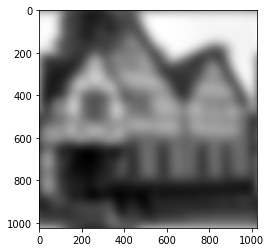

In [4]:
# Constants
sigma = 25
blurred_photo = loadtxt('blur.txt', float)
y_dim, x_dim = blurred_photo.shape


#print(blurred_photo)

imshow(blurred_photo,cmap='gray')
             
             
#print(blurred_photo)
#print(y_dim)
#print(x_dim)

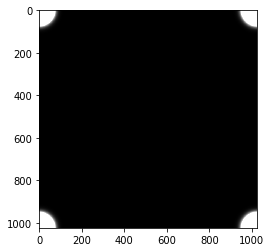

In [5]:
def point_spread(x, y):
    return exp(- ( x ** 2 + y ** 2 ) / (2 * sigma ** 2))

point_spread_array = empty([ y_dim, x_dim ], float)

#print(point_spread_array)
#print(point_spread_array.shape)

for i in range(y_dim):
    for j in range(x_dim):
        m = (j + y_dim / 2) % y_dim - y_dim / 2
        n = (i + x_dim / 2) % x_dim - x_dim / 2
        point_spread_array[i, j] = point_spread(m,n)

imshow(point_spread_array, cmap='gray', vmin=0,vmax=0.01)
#print(m)
#print(n)

In [6]:
# Fourier transform both
blurred_photo_fourier = rfft2(blurred_photo)
point_spread_fourier = rfft2(point_spread_array)

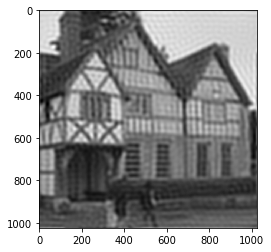

In [13]:
 #divide
unblurred_fourier = empty([ y_dim, x_dim // 2 + 1], complex)
epsilon = 10 ** -4
for i in range(x_dim // 2 + 1):
    for j in range(y_dim):
        if abs(point_spread_fourier[j, i]) < epsilon:
            unblurred_fourier[j, i] = blurred_photo_fourier[j, i]
        else:
                unblurred_fourier[j, i] = blurred_photo_fourier[j, i] / (point_spread_fourier[j, i])
                
imshow(irfft2(unblurred_fourier))
gray()
show()
               